In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression

In [58]:
df=pd.read_csv('Data Set/Oscars.csv')   # reading the dataset into a dataframe

In [8]:
df['gross'].isnull().sum()     # getting the count of all null values in 'gross' column

24

In [68]:
# Filtering all the nan values in the 'popularity' and 'critic_reviews' columns and appending to list
pop=[]
nom=[]
for i in df.index:
    if(not np.isnan(df['popularity'][i])):
        pop.append(df['popularity'][i])
        nom.append(df['critic_reviews'][i])

In [69]:
X = np.array(pop).reshape(-1, 1)
# values converts it into a numpy array
Y = np.array(nom).reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)

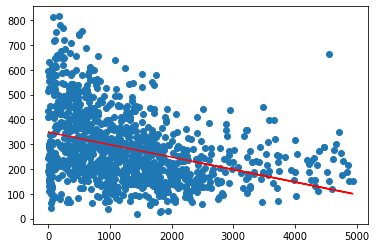

In [70]:
# Plotting a scatter plot of the above defined list to see the correlation using linear regression line
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [16]:
df['certificate'].value_counts()   # Getting the count of each unique value in the 'certificate' coulmn

R            515
PG-13        489
PG           130
G             20
Not Rated     14
Unrated        4
TV-MA          1
Name: certificate, dtype: int64

In [17]:
df['certificate']=df['certificate'].fillna('Not Rated')    # replacing all nan values in 'certificate' column to Not Rated

In [18]:
df['certificate'].isnull().sum()   # checking for null values after pre-processing

0

In [19]:
df['certificate'].value_counts()

R            515
PG-13        489
PG           130
Not Rated     24
G             20
Unrated        4
TV-MA          1
Name: certificate, dtype: int64

In [73]:
df['popularity'].to_csv('processed.csv')   # extracting 'popularity' column into a csv file for preprocessing

In [44]:
df['popularity'].isnull().sum()   # getting count of null values in popularity column

119

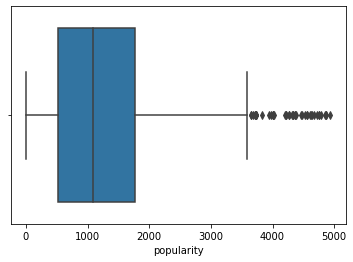

In [45]:
# plottng a box plot for popularity column to check the outliers in the column
import seaborn as sns
sns.boxplot(x=df['popularity'])

In [18]:
# Creating a dictionary with kys as year and adding gross into the dictionary if not nan
import numpy as np
d=dict()
for i in df.index:
    if(df['year'][i] not in d.keys()):
        d[df['year'][i]]=[]
        if(not np.isnan(df['gross'][i])):
            d[df['year'][i]].append(df['gross'][i])
    if(not np.isnan(df['gross'][i])):
        d[df['year'][i]].append(df['gross'][i])

In [19]:
# calculating the mean value for gross present in the dictionary
from statistics import mean
for k,v in d.items():
    d[k]=mean(v)

In [21]:

for i in df.index:
    if(np.isnan(df['gross'][i])):
        df['gross'][i]=d[df['year'][i]]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
len(df[df['popularity']>3644.75].index.to_list())   # checking the number of values in populairty that are abve the 3rd quartile

44

In [46]:
# Calculating the !st,#rd and Inter-quartile range for popularity to check the outliers
Q1 =df['popularity'].quantile(0.25)
Q3 = df['popularity'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1248.0


In [47]:
(Q3+  1.5 * IQR)    # 3rd quratile value

3644.75

In [36]:
df['metascore'][57]

9.0

In [71]:
# Replacing null values in popularity with the mean of the rest of the values in popularity
import math
df['popularity'] = df['popularity'].fillna(math.ceil(df['popularity'].mean()))

In [41]:
df['user_reviews'].isnull().sum()   # checking for null values in user_reviews

0

In [59]:
df[df['critic_reviews'].isnull()].index.tolist()   # checking location of null values in critic_reviews

[574, 1094, 1104, 1116, 1121, 1124, 1130]

In [60]:
df[df['user_reviews'].isnull()].index.tolist()    # checking the location of null values in user_reviews

[574, 1094, 1104, 1116, 1121, 1124, 1130]

In [89]:
df['Oscar_Best_OriScreen_nominated'].isnull().sum()

0

In [ ]:
df['c'] = df.apply(
    lambda row: row['a']*row['b'] if np.isnan(row['c']) else row['c'],
    axis=1
)

In [9]:
df=pd.read_excel('DA Assignment Initial DataSet.xlsx')   # Creating a dataframe to collect the initial data

In [3]:
# Identifying the columns that would impact prediction analysis 
add=['Golden_Globes_won','BAFTA_won','Screen_Actors_Guild_won','Critics_Choice_won','Directors_Guild_won','Producers_Guild_won','Art_Directors_Guild_won','Writers_Guild_won','Costume_Designers_Guild_won','Online_Film_Television_Association_won','People_Choice_won','London_Critics_Circle_Film_won','American_Cinema_Editors_won','Hollywood_Film_won','Austin_Film_Critics_Association_won','Denver_Film_Critics_Society_won','Boston_Society_of_Film_Critics_won','New_York_Film_Critics_Circle_won','Los_Angeles_Film_Critics_Association_won']

In [4]:
# Detecting the columns that are not realted to Oscar awards ex: BAFTA,Golden Globes etc
nonOscar=[]
for i in df.index:
    count=0
    for j in add:
        count+=df[j][i]
    nonOscar.append(count)
        
    
    

In [5]:
nonOscar

[1,
 4,
 0,
 2,
 25,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 7,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 5,
 0,
 0,
 5,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 39,
 18,
 1,
 0,
 2,
 0,
 17,
 0,
 1,
 2,
 4,
 2,
 0,
 16,
 16,
 0,
 0,
 1,
 1,
 8,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 25,
 1,
 0,
 0,
 0,
 12,
 0,
 0,
 0,
 1,
 0,
 0,
 22,
 0,
 3,
 5,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 2,
 0,
 0,
 0,
 6,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 6,
 1,
 0,
 0,
 4,
 6,
 0,
 3,
 0,
 0,
 0,
 0,
 11,
 0,
 0,
 0,
 12,
 0,
 1,
 0,
 0,
 0,
 1,
 5,
 0,
 0,
 0,
 0,
 2,
 0,
 8,
 0,
 2,
 0,
 4,
 2,
 0,
 0,
 6,
 1,
 0,
 0,
 2,
 5,
 2,
 0,
 0,
 0,
 12,
 0,
 0,
 0,
 14,
 8,
 2,
 0,
 3,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 12,
 5,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 4,
 1,
 0,
 4,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 4,
 0,
 0,
 0,
 14,
 1,
 7,
 3,
 4,
 0,
 1,
 19,
 3,
 0,
 1,
 0,
 0,
 0,
 3,
 6,
 0,
 0,
 3,
 0,
 0,
 3,
 7,
 0,
 0,
 0,
 1,
 6

In [6]:
df['nonOscar']=nonOscar

In [7]:
df.to_csv('processed.csv')   # creating a dataframe to append pre=processed data

In [8]:
len(add)

19

In [10]:
checkCat='director'

In [11]:
# Columns that directly impact the prediction of winning Oscar
add = [
  'Golden_Globes_won_categories',
  'BAFTA_won_categories',
  'Screen_Actors_Guild_won_categories',
  'Critics_Choice_won_categories',
  'Directors_Guild_won_categories',
  'Producers_Guild_won_categories',
  'Art_Directors_Guild_won_categories',
  'Writers_Guild_won_categories',
  'Costume_Designers_Guild_won_categories',
  'Online_Film_Television_Association_won_categories',
  'Online_Film_Critics_Society_won_categories',
  'People_Choice_won_categories',
  'London_Critics_Circle_Film_won_categories',
  'American_Cinema_Editors_won_categories',
  'Hollywood_Film_won_categories',
  'Austin_Film_Critics_Association_won_categories',
  'Denver_Film_Critics_Society_won_categories',
  'Boston_Society_of_Film_Critics_won_categories',
  'New_York_Film_Critics_Circle_won_categories',
  'Los_Angeles_Film_Critics_Association_won_categories'
]


In [16]:
df['nonOscarValue']=df['non_Oscar_nominated'].to_list()    # adding the non-Oscar award data into a list

In [17]:
df['nonOscarValue'].to_csv('preprossed.csv')     # appending the non-Oscar list into the pre-processed dataset